# B929164 Machine Learning CW2

This project aims to create a machine learning model that could determine if a customer would be a good fit to receive a line of credit or not based on a number of relevant financial features.

The data set being used can be found [here](https://www.kaggle.com/c/home-credit-default-risk/data). First published by Hans Hofmann, it contains financial information about german customers from 1994.

A machine learning model that can predict whether a customer should be given credit can be useful for several reasons, lending institutions, such as banks or credit card companies, can use this model to assess the risk associated with providing credit to a particular customer by analysing various factors and patterns in the customer's data. This information helps lenders make informed decisions about granting credit and setting appropriate terms and interest rates. Additionally it can also improve efficiency by automating the process of assessing credit risk.

Furthermore, it can also benefit the customer as customers can use this model to assess their own credit risk and make informed decisions about applying for credit without having to go through the process of applying for credit and being rejected which can have a negative impact on their credit score. It can also eliminate bias that may be present in human decision making.

Objectives:
- To create a machine learning model that can predict whether a customer should be given credit or not.
- To analyse the performance of the model 
- To identify the most important features in the data set

## Overview

- [Importing Libraries](#Importing-Libraries) : Importing the necessary libraries
- [Downloading and Importing Data](#Downloading-and-Importing-Data) : Downloading and importing the data frame
- [Data Preparation](#Data-Preparation) : Checking if the data is suitable for analysis
- [Initial Data Exploration](#Initial-Data-Exploration) : Exploring the data to get a better understanding of the data
    - [checking_status](#checking_status)
    - [duration](#duration)
    - [credit_history](#credit_history)
    - [purpose](#Purpose)
    - [credit_amount](#credit_amount)
    - [savings_status](#savings_status)
    - [employment](#employment)
    - [installment_commitment](#installment_commitment)
    - [personal_status](#personal_status)
    - [sex](#Sex)
    - [marital Status](#Marital-Status)
    - [other_parties](#other_parties)
    - [residence_since](#residence_since)
    - [property_magnitude](#property_magnitude)
    - [age](#Age)
    - [other_payment_plans](#other_payment_plans)
    - [housing](#housing)
    - [existing_credits](#existing_credits)
    - [job](#job)
    - [num_dependents](#num_dependents)
    - [own_telephone](#own_telephone)
    - [foreign_worker](#foreign_worker)
    - [class](#class)
- [Initial Data Exploration Summary](#Initial-Data-Exploration-Summary) : Summary of the initial data exploration and the insights gained
- [Machine Learning](#Machine-Learning) : Creating a machine learning model
    - [Data Preprocessing](#Data-Preprocessing) : Preprocessing the data to prepare it for machine learning
    - [Model Selection](#Model-Selection) : Selecting the best model for the data
    - [Training the Model](#Training-the-Model) : Training the model
- [Results](#Results) : The results of the model
    - [Feature Importance](#Feature-Importance) : Identifying the most important features in the data set
- [Feature Optimisation](#Feature-Optimisation) : Optimising the features in the data set and retraining the model
    - [Preprocessing](#Preprocessing) : Preprocessing the data to prepare it for machine learning
    - [Training](#Training) : Training the model
    - [New Results](#New-Results) : The results of the model
- [Conclusion](#Conclusion) : Conclusion

## Importing Libraries

In [291]:
# [Imports]

# General purpose data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# File system management
import os
import warnings
warnings.filterwarnings('ignore')

# Machine learning libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.metrics import classification_report

## Downloading and Importing Data

In [292]:
# This section will search the current directory for the data file (credit_customers.csv) 
# if it is not found in the current directory, it will download it from the GitHub repository.

if os.path.isfile('credit_customers.csv'):
    print('File is present')
    df = pd.read_csv('credit_customers.csv')
else:
    try:
        print('File is not present. Downloading file from GitHub repository...')
        url = 'https://raw.githubusercontent.com/ajayvarghese2000/22WSD074-Machine-Learning-Principles-CW2/main/credit_customers.csv'
        df = pd.read_csv(url)
        df.to_csv('credit_customers.csv', index=False)
        print('File downloaded successfully')
    except:
        print('Unable to download file from GitHub repository. Please check your internet connection and try again.')

File is present


## Data Preparation

The following steps will explore the dataset and ensure it is ready for the machine learning model and EDA

In [293]:
# Display the first 5 rows of the dataset
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


Here there are 21 features with 1000 rows of data. The features are a mix of categorical and numerical data. The target variable is the 'class' column which is either good or bad denoting whether the customer is a good fit for credit or not.

The definitions of the other features are as follows below:

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [295]:
# Check for missing values
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

Here as there are no missing values, there is no need to impute any data. However, there are some categorical features that need to be encoded before they can be used in the model.
The next section will explore the data further.

In [296]:
# Check for duplicate values
df.duplicated().sum()

0

As there are no null or missing values and no duplicates, the data is ready for analysis.

## Initial Data Exploration

### checking_status	

In [297]:
# Get the unique values in the checking_status column
df['checking_status'].unique()

array(['<0', '0<=X<200', 'no checking', '>=200'], dtype=object)

Here the status of the checking account is given as a categorical variable. The categories are as follows:

<!-- Table of categories -->
<table>
<thead>
  <tr>
    <th>Category</th>
    <th>Definition</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>no checking</td>
    <td>&lt; They do not have a checking account</td>
  </tr>
  <tr>
    <td>&lt; 0 DM</td>
    <td>&lt; They have less than 0 DM in their account</td>
  </tr>
  <tr>
    <td>0&lt; ... &lt; 200 DM</td>
    <td>&lt; They have between 0 and 200 DM in their account</td>
  </tr>
  <tr>
    <td>&gt;= 200 DM</td>
    <td>&lt; They have more than 200 DM in their account</td>
  </tr>
</tbody>
</table>

As this is a german dataset all the values are in DM (Deutsche Mark) which is the currency used in Germany before the Euro was introduced. 200 DM is equivalent to about £2076.3 in today's money.

<Axes: xlabel='checking_status', ylabel='count'>

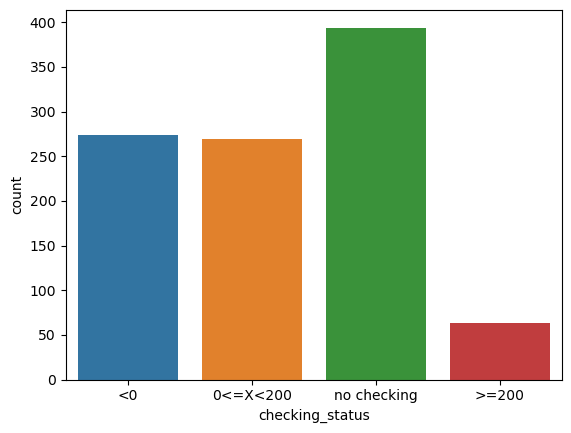

In [298]:
# Plotting a graph of the number of data point in each checking_status category
sns.countplot(x='checking_status', data=df)

Here we can see there is a almost equal split between the categories < 0 DM and 0 < ... < 200 DM. 
However there are a disproportionate amount of customers with no checking account and a very small amount of customers with more than 200 DM in their account.
This will impact the model as it will be biased towards customers with no checking account.

Text(0, 0.5, 'Percentage')

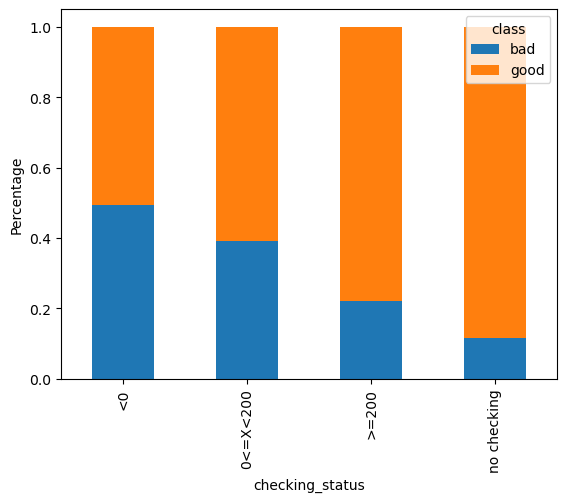

In [299]:
# For each category in the checking_status column, get the percentage of customers who are classed as good and bad then plot the results as a bar chart with two stacked bars for each category
df.groupby('checking_status')['class'].value_counts(normalize=True).unstack().sort_values(by='bad', ascending=False).plot(kind='bar', stacked=True)

# Y axis label
plt.ylabel('Percentage')

Here we can see that there seems to be a trend where the more money you have in a checking account then the higher the chance of being a good fit for credit. This makes sense as having more money in your account means you are more likely to be able to pay back the credit.

However, having no checking account seems to have a higher chance of being a good fit for credit than having less than 0 DM in your account which is a bit of an outlier at first glance.

### duration

In [300]:
# Get the unique values in the duration column
df['duration'].unique()

array([ 6., 48., 12., 42., 24., 36., 30., 15.,  9., 10.,  7., 60., 18.,
       45., 11., 27.,  8., 54., 20., 14., 33., 21., 16.,  4., 47., 13.,
       22., 39., 28.,  5., 26., 72., 40.])

Duration is the length of time that customer wants to take the loan out for. This is a numerical value in months.

<Axes: xlabel='duration', ylabel='count'>

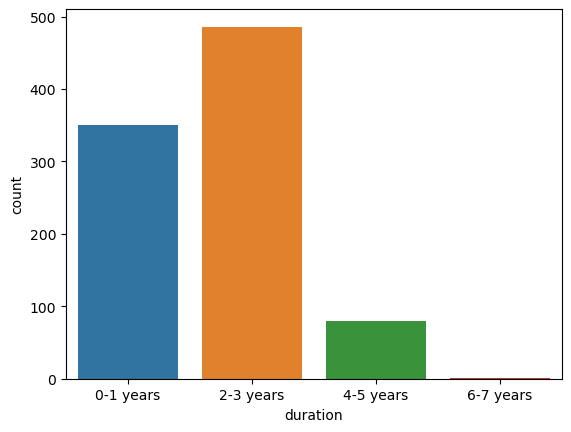

In [301]:
# Copy the dataframe to a local variable to avoid making changes to the original dataframe
local_df = df.copy()

# Convert the duration column from months to years
local_df['duration'] = round(local_df['duration'] / 12, 0)

# Group the duration column into 4 categories 0-1 years, 2-3 years, 4-5 years, 6-7 years
local_df['duration'] = pd.cut(local_df['duration'], bins=[0, 1, 3, 5, 7], labels=['0-1 years', '2-3 years', '4-5 years', '6-7 years'])

# Plotting a graph of the number of data point in each duration category
sns.countplot(x='duration', data=local_df)

From here it is clear to see that we have a bias to loans of 0-3 years with a peak at 2 years. 
This means that the model will be better at assessing loans of this length and may not be as accurate for loans of other lengths, especially those in the 6-7 year range.

Text(0, 0.5, 'Percentage')

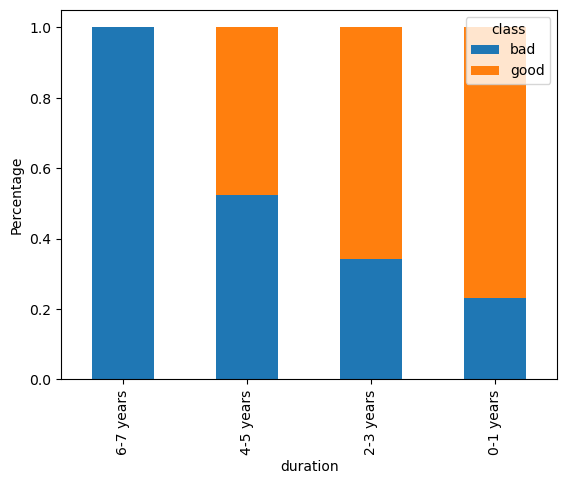

In [302]:
# For each category in the checking_status column, get the percentage of customers who are classed as good and bad then plot the results as a bar chart with two stacked bars for each category
local_df.groupby('duration')['class'].value_counts(normalize=True).unstack().sort_values(by='bad', ascending=False).plot(kind='bar', stacked=True)

# Y axis label
plt.ylabel('Percentage')

Here we can see that the longer the duration of the loan, the higher the chance of being a bad fit for credit. This makes sense as the longer the duration of the loan, the more time there is for the customer to default on the loan and not pay it back.

However the reality may not be as extreme as this graph suggests as there are very few loans with a duration of 6-7 years biasing the graph towards the shorter duration loans.

### credit_history

In [303]:
# Get the unique values in the credit_history column
df['credit_history'].unique()

array(['critical/other existing credit', 'existing paid',
       'delayed previously', 'no credits/all paid', 'all paid'],
      dtype=object)

Credit history is a categorical variable that describes the customer's credit history. The categories are as follows:

<!-- Table of categories -->
<table>
<thead>
  <tr>
    <th>Category</th>
    <th>Definition</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>no credits/all paid</td>
    <td>They have never taken out credit and therefore have always paid it back on time</td>
  </tr>
  <tr>
    <td>all paid</td>
    <td>They have taken out credit before and have always paid it back on time</td>
  </tr>
  <tr>
    <td>existing paid</td>
    <td>They have taken out credit before and have always paid it back on time</td>
  </tr>
  <tr>
    <td>delayed previously</td>
    <td>They have taken out credit before and have paid it back late</td>
  </tr>
  <tr>
    <td>critical/other existing credit (not at this bank)</td>
    <td>They have taken out credit before and have paid it back late</td>
  </tr>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'critical/other existing credit'),
  Text(1, 0, 'existing paid'),
  Text(2, 0, 'delayed previously'),
  Text(3, 0, 'no credits/all paid'),
  Text(4, 0, 'all paid')])

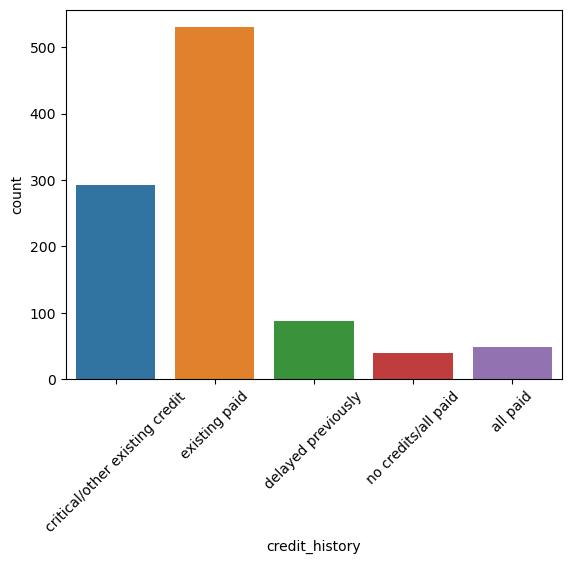

In [304]:
# Plotting a graph of the number of data point in each credit_history category
sns.countplot(x='credit_history', data=df)

# Angle the x-axis labels to avoid overlapping
plt.xticks(rotation=45)

Here we can see that the majority of customers have exiting paid credit history. This means that the model will be better at assessing customers with this credit history and may not be as accurate for customers with other little to np credit history.

Text(0, 0.5, 'Percentage')

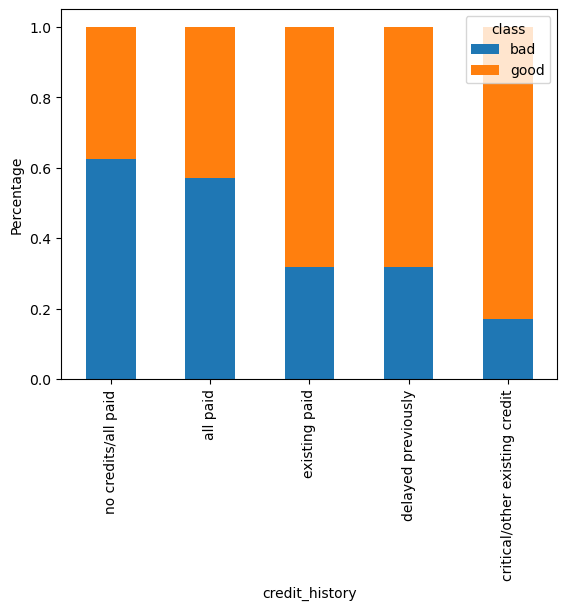

In [305]:
# For each category in the credit_history column, get the percentage of customers who are classed as good and bad then plot the results as a bar chart with two stacked bars for each category sorted by the percentage of bad customers
df.groupby('credit_history')['class'].value_counts(normalize=True).unstack().sort_values(by='bad', ascending=False).plot(kind='bar', stacked=True)

# Y axis label
plt.ylabel('Percentage')

### Purpose

In [306]:
# Get the unique values in the purpose column
df['purpose'].unique()

array(['radio/tv', 'education', 'furniture/equipment', 'new car',
       'used car', 'business', 'domestic appliance', 'repairs', 'other',
       'retraining'], dtype=object)

Purpose is a categorical variable that describes the purpose of the loan. The categories are as follows:

<!-- Table of categories -->
<table>
<thead>
  <tr>
    <th>Category</th>
    <th>Definition</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>new car</td>
    <td>They are taking out a loan to buy a new car</td>
  </tr>
  <tr>
    <td>used car</td>
    <td>They are taking out a loan to buy a used car</td>
  </tr>
  <tr>
    <td>furniture/equipment</td>
    <td>They are taking out a loan to buy furniture or equipment</td>
  </tr>
  <tr>
    <td>radio/television</td>
    <td>They are taking out a loan to buy a radio or television</td>
  </tr>
  <tr>
    <td>domestic appliances</td>
    <td>They are taking out a loan to buy domestic appliances</td>
  </tr>
  <tr>
    <td>repairs</td>
    <td>They are taking out a loan to pay for repairs</td>
  </tr>
  <tr>
    <td>retraining</td>
    <td>They are taking out a loan to pay for retraining</td>
  </tr>
  <tr>
    <td>business</td>
    <td>They are taking out a loan to pay for business</td>
  </tr>
  <tr>
    <td>other</td>
    <td>They are taking out a loan for another purpose</td>
  </tr>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radio/tv'),
  Text(1, 0, 'education'),
  Text(2, 0, 'furniture/equipment'),
  Text(3, 0, 'new car'),
  Text(4, 0, 'used car'),
  Text(5, 0, 'business'),
  Text(6, 0, 'domestic appliance'),
  Text(7, 0, 'repairs'),
  Text(8, 0, 'other'),
  Text(9, 0, 'retraining')])

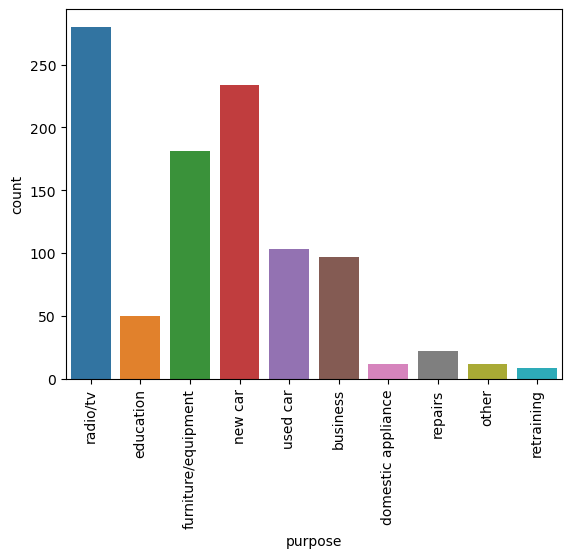

In [307]:
# Plotting a graph of the number of data point in each purpose category
sns.countplot(x='purpose', data=df)

# Angle the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

<Axes: xlabel='purpose'>

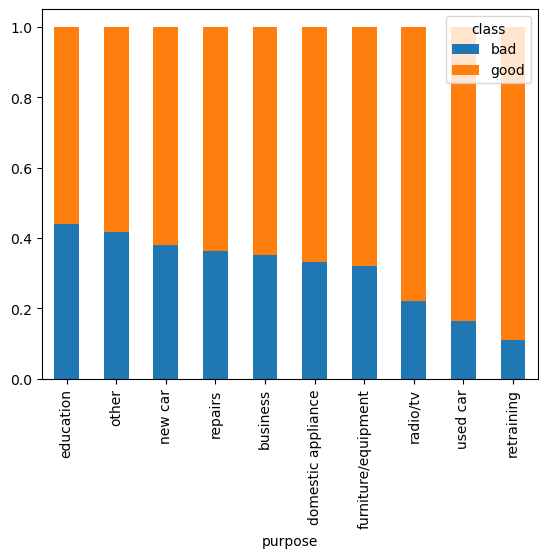

In [308]:
# For each category in the purpose column, get the percentage of customers who are classed as good and bad then plot the results as a bar chart with two stacked bars for each category sorted by the percentage of bad customers
df.groupby('purpose')['class'].value_counts(normalize=True).unstack().sort_values(by='bad', ascending=False).plot(kind='bar', stacked=True)

Here there doesn't seem to be any obvious pattern in the data, most of the reasons seem to have the same proportion of good and bad customers apart from the radio/tv and used car category. However, there are a disproportionate amount of customers taking out loans for new cars and radio/television. This will impact the model as it will be biased towards customers taking out loans for these purposes.  

### credit_amount

In [309]:
# Get the unique values in the credit_amount column
df['credit_amount'].count()

1000

In [310]:
# Get the info about the credit_amount column
df['credit_amount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: credit_amount, dtype: float64

The credit amount is a numerical value that describes the amount of credit the customer is taking out.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0-2000'),
  Text(1, 0, '2001-4000'),
  Text(2, 0, '4001-6000'),
  Text(3, 0, '6001-8000'),
  Text(4, 0, '8001-10000'),
  Text(5, 0, '10001-12000'),
  Text(6, 0, '12001-14000'),
  Text(7, 0, '14001-16000'),
  Text(8, 0, '16001-18000'),
  Text(9, 0, '18001-20000')])

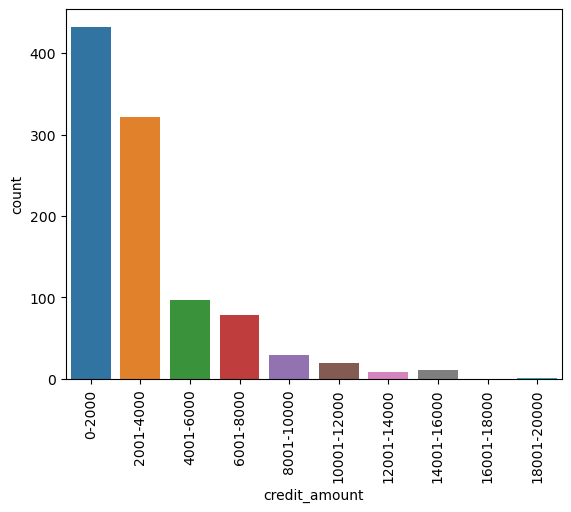

In [311]:
# Copy the dataframe to a local variable to avoid making changes to the original dataframe
local_df = df.copy()

# Group the credit_amount column into 10 categories 0-2000, 2001-4000, 4001-6000, 6001-8000, 8001-10000, 10001-12000, 12001-14000, 14001-16000, 16001-18000, 18001-20000
local_df['credit_amount'] = pd.cut(local_df['credit_amount'], bins=[0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000], labels=['0-2000', '2001-4000', '4001-6000', '6001-8000', '8001-10000', '10001-12000', '12001-14000', '14001-16000', '16001-18000', '18001-20000'])

# Plotting a graph of the number of data point in each credit_amount category
sns.countplot(x='credit_amount', data=local_df)

# angle the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

### savings_status

In [312]:
# get the unique values in the savings_account column
df['savings_status'].unique()

array(['no known savings', '<100', '500<=X<1000', '>=1000', '100<=X<500'],
      dtype=object)

This is a categorical variable that describes the customer's savings status. The categories are as follows:

<!-- Table of categories -->
<table>
<thead>
  <tr>
    <th>Category</th>
    <th>Definition</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>&lt; 100 DM</td>
    <td>They have less than 100 DM in savings</td>
  </tr>
  <tr>
    <td>100&lt; ... &lt; 500 DM</td>
    <td>They have between 100 and 500 DM in savings</td>
  </tr>
  <tr>
    <td>500&lt; ... &lt; 1000 DM</td>
    <td>They have between 500 and 1000 DM in savings</td>
  </tr>
  <tr>
    <td>&gt;= 1000 DM</td>
    <td>They have more than 1000 DM in savings</td>
  </tr>
  <tr>
    <td>unknown/no savings account</td>
    <td>They do not have a savings account</td>
  </tr>

<Axes: xlabel='savings_status', ylabel='count'>

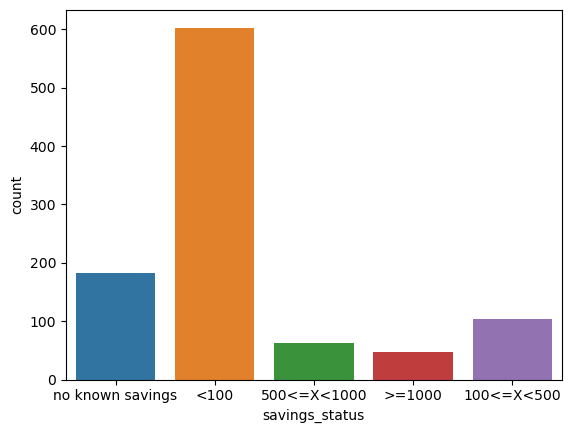

In [313]:
# Plotting a graph of the number of data point in each savings_account category
sns.countplot(x='savings_status', data=df)


Here we can see that the majority of customers have less than 100 DM in savings. This means that the model will be better at assessing customers with this savings status and may not be as accurate for customers with other savings statuses.

Text(0, 0.5, 'Percentage')

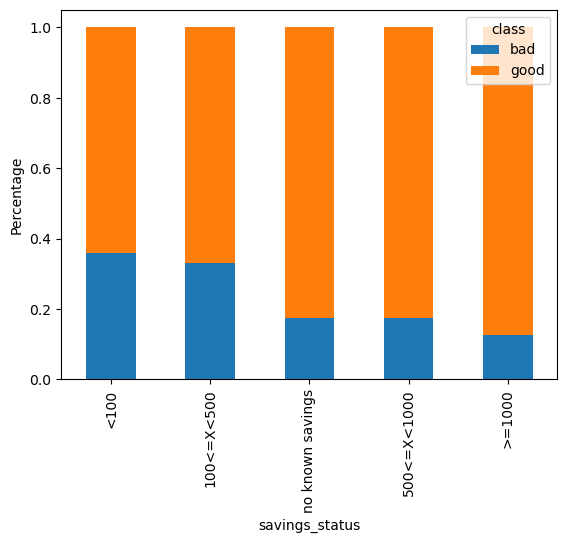

In [314]:
# For each category in the savings_account column, get the percentage of customers who are classed as good and bad then plot the results as a bar chart with two stacked bars for each category sorted by the percentage of bad customers
df.groupby('savings_status')['class'].value_counts(normalize=True).unstack().sort_values(by='bad', ascending=False).plot(kind='bar', stacked=True)

# Y axis label
plt.ylabel('Percentage')

Here we can see that the more money you have in savings, the higher the chance of being a good fit for credit. This makes sense as having more money in your savings means you are more likely to be able to pay back the credit.

### employment

In [315]:
# Get the unique values in the employment column
df['employment'].unique()

array(['>=7', '1<=X<4', '4<=X<7', 'unemployed', '<1'], dtype=object)

Employment is a categorical variable that describes the customer's employment status. The categories are as follows:

<!-- Table of categories -->
<table>
<thead>
  <tr>
    <th>Category</th>
    <th>Definition</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>unemployed</td>
    <td>They are unemployed</td>
  </tr>
  <tr>
    <td>&lt; 1 year</td>
    <td>They have been employed for less than 1 year</td>
  </tr>
  <tr>
    <td>1&lt; ... &lt; 4 years</td>
    <td>They have been employed for between 1 and 4 years</td>
  </tr>
  <tr>
    <td>4&lt; ... &lt; 7 years</td>
    <td>They have been employed for between 4 and 7 years</td>
  </tr>
  <tr>
    <td>&gt;= 7 years</td>
    <td>They have been employed for more than 7 years</td>
  </tr>

<Axes: xlabel='employment', ylabel='count'>

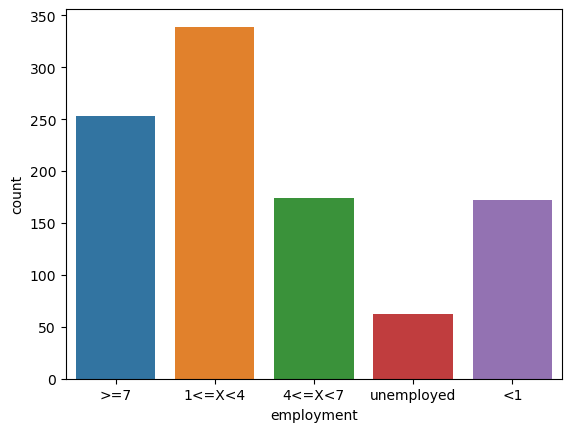

In [316]:
# Plotting a graph of the number of data point in each employment category
sns.countplot(x='employment', data=df)

We can see that we have a fairly even spread of customers across the categories. This means that the model will be able to assess customers with all employment statuses fairly well.

Text(0, 0.5, 'Percentage')

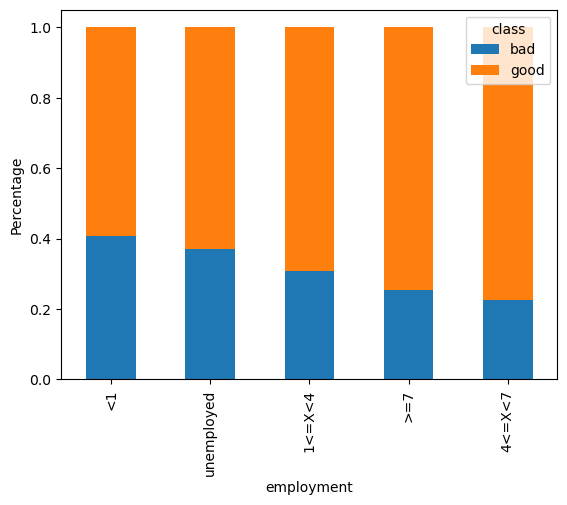

In [317]:
# For each category in the employment column, get the percentage of customers who are classed as good and bad then plot the results as a bar chart with two stacked bars for each category sorted by the percentage of bad customers
df.groupby('employment')['class'].value_counts(normalize=True).unstack().sort_values(by='bad', ascending=False).plot(kind='bar', stacked=True)

# Y axis label
plt.ylabel('Percentage')

As expected, the longer you have been employed, the more likely you are to be a good fit for credit. This is because you are more likely to have a stable income and therefore be able to pay back the credit.

### installment_commitment

In [318]:
# Get the unique values in the installment_commitment column
df['installment_commitment'].unique()

array([4., 2., 3., 1.])

the installment commitment is a numerical value that describes the percentage of disposable income that the customer will use to pay back the credit. The higher the value, the higher the percentage of disposable income that the customer has to pay back the credit.

<Axes: xlabel='installment_commitment', ylabel='count'>

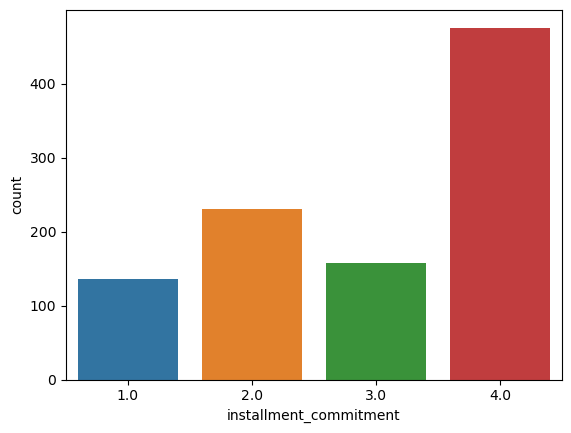

In [319]:
# Plotting a graph of the number of data point in each installment_commitment category
sns.countplot(x='installment_commitment', data=df)

We can see that the data has a bias to people who are paying back with 4% of their disposable income. This means that the model will be better at assessing customers with this installment commitment and may not be as accurate for customers with other installment commitments.

Text(0, 0.5, 'Percentage')

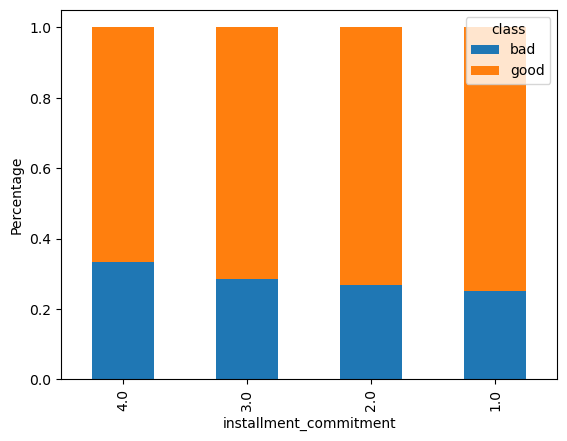

In [320]:
# For each category in the installment_commitment column, get the percentage of customers who are classed as good and bad then plot the results as a bar chart with two stacked bars for each category sorted by the percentage of bad customers
df.groupby('installment_commitment')['class'].value_counts(normalize=True).unstack().sort_values(by='bad', ascending=False).plot(kind='bar', stacked=True)

# Y axis label
plt.ylabel('Percentage')

As expected the lower the percentage of disposable income that the customer use to pay back the credit, the more likely they are to be a good fit for credit. This is because they have more disposable income to pay back the credit.

### personal_status

In [321]:
# Get the unique values in the personal_status column
df['personal_status'].unique()

array(['male single', 'female div/dep/mar', 'male div/sep',
       'male mar/wid'], dtype=object)

Here personal_status has information on their sex and marital status. For best results these should be split into two separate variables.

In [322]:
# Splitting the personal_status column into two columns one for sex and the other for marital status using space as the delimiter

sex = []
marital_status = []

for i in df['personal_status']:
    # Split the string into a list of strings using space as the delimiter
    temp = i.split(' ')
    # Add index 0 to sex list
    sex.append(temp[0])
    # Add index 1 to marital_status list
    marital_status.append(temp[1])

# add the sex and marital_status lists to the dataframe
df['sex'] = sex
df['marital_status'] = marital_status

# Drop the personal_status column
df.drop('personal_status', axis=1, inplace=True)

### Sex

<Axes: xlabel='sex', ylabel='count'>

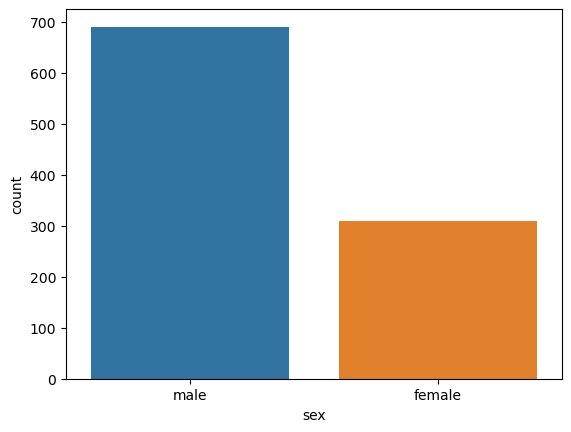

In [323]:
# Plotting a graph of the number of data point in each sex category
sns.countplot(x='sex', data=df)

Here we can see that there is a significantly larger number of male data than female data which will cause the model to be biased towards male customers.

Text(0, 0.5, 'Percentage')

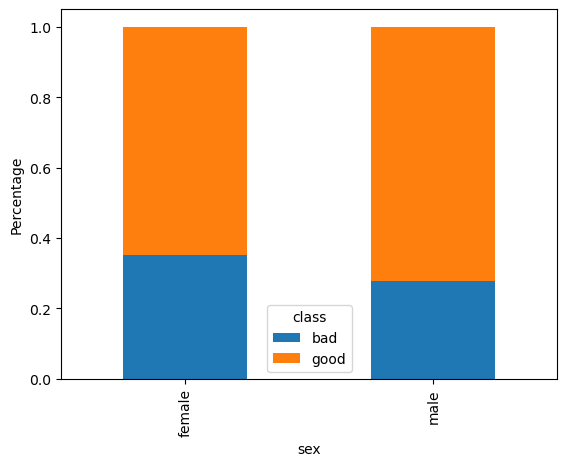

In [324]:
# For each category in the sex column, get the percentage of customers who are classed as good and bad then plot the results as a bar chart with two stacked bars for each category sorted by the percentage of bad customers
df.groupby('sex')['class'].value_counts(normalize=True).unstack().sort_values(by='bad', ascending=False).plot(kind='bar', stacked=True)

# Y axis label
plt.ylabel('Percentage')

Here we can see that there is an even-ish split between male and female applicants suggesting that sex may not be an important factor.

### Marital Status

In [325]:
# Get the unique values in the marital_status column
df['marital_status'].unique()

array(['single', 'div/dep/mar', 'div/sep', 'mar/wid'], dtype=object)

Here marital status has information on the customer's marital status, they are self explanatory.

<Axes: xlabel='marital_status', ylabel='count'>

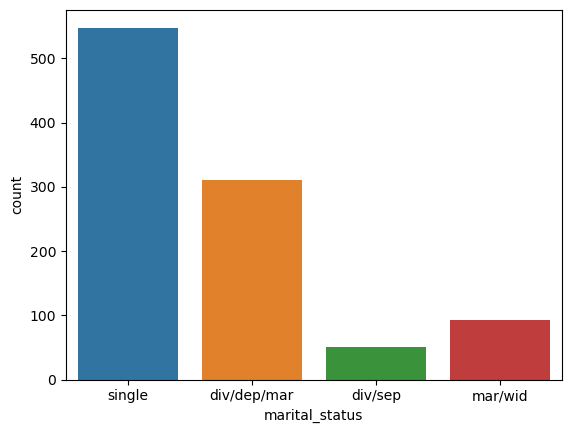

In [326]:
# Plotting a graph of the number of data point in each marital_status category
sns.countplot(x='marital_status', data=df)

Here the data is weighted to customers who are single. This means that the model will be better at assessing single customers and may not be as accurate for customers with other marital statuses.

Text(0, 0.5, 'Percentage')

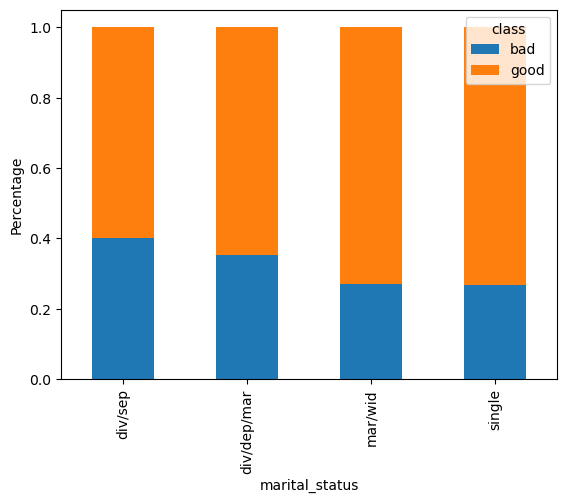

In [327]:
# For each category in the marital_status column, get the percentage of customers who are classed as good and bad then plot the results as a bar chart with two stacked bars for each category sorted by the percentage of bad customers
df.groupby('marital_status')['class'].value_counts(normalize=True).unstack().sort_values(by='bad', ascending=False).plot(kind='bar', stacked=True)

# Y axis label
plt.ylabel('Percentage')

Looking at the percentage split it seems that your marital status does not have a large impact on whether you are a good fit for credit.

### other_parties

In [328]:
# Get the unique values in the other_parties column
df['other_parties'].unique()

array(['none', 'guarantor', 'co applicant'], dtype=object)

Other parties is a categorical variable that describes whether the customer has any other parties to the credit agreement. The categories are as follows:

<!-- Table of categories -->
<table>
<thead>
  <tr>
    <th>Category</th>
    <th>Definition</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>none</td>
    <td>They have no other parties to the credit agreement</td>
  </tr>
  <tr>
    <td>co-applicant</td>
    <td>They have a co-applicant to the credit agreement</td>
  </tr>
  <tr>
    <td>guarantor</td>
    <td>They have a guarantor to the credit agreement</td>
  </tr>

<Axes: xlabel='other_parties', ylabel='count'>

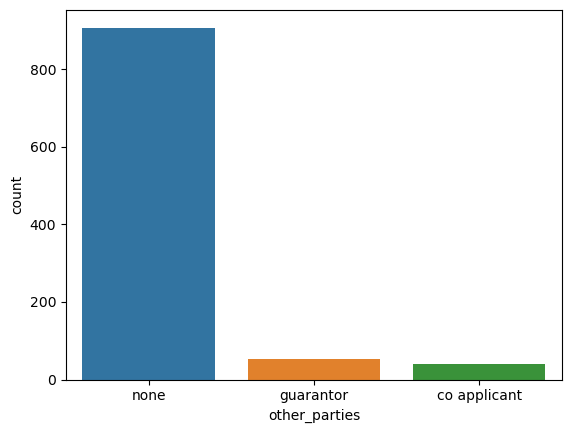

In [329]:
# Plotting a graph of the number of data point in each other_parties category
sns.countplot(x='other_parties', data=df)

Here we can see that the majority of customers have no other parties to the credit agreement. This means that the model will be better at assessing customers with no other parties and may not be as accurate for customers with other parties.

Text(0, 0.5, 'Percentage')

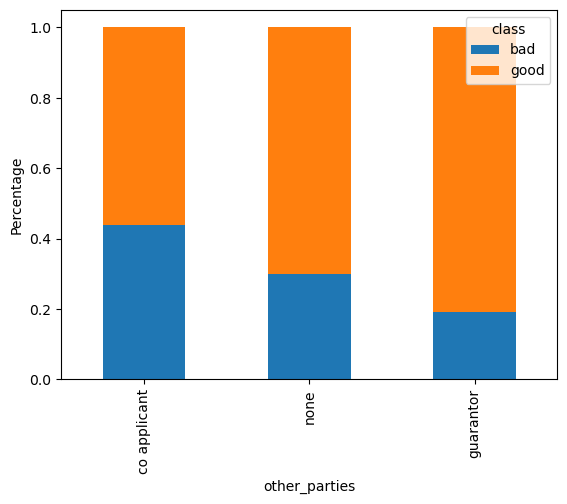

In [330]:
# For each category in the other_parties column, get the percentage of customers who are classed as good and bad then plot the results as a bar chart with two stacked bars for each category sorted by the percentage of bad customers
df.groupby('other_parties')['class'].value_counts(normalize=True).unstack().sort_values(by='bad', ascending=False).plot(kind='bar', stacked=True)

# Y axis label
plt.ylabel('Percentage')

Here it seems that your are more likely to be a good fit for credit if you have guarantor. This is because the guarantor is liable for the credit if you are unable to pay it back.

It also shows that if there is a co-applicant, you are more likely to be a bad fit for credit.

### residence_since

In [331]:
# Get the unique values in the residence_since column
df['residence_since'].unique()

array([4., 2., 3., 1.])

The residence since is a numerical value that describes the number of years the customer has lived at their current residence.

<Axes: xlabel='residence_since', ylabel='count'>

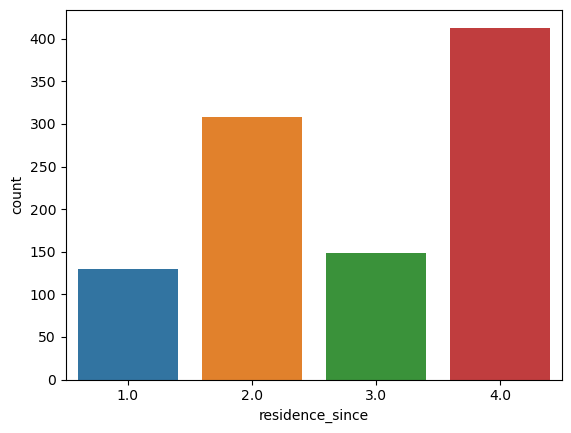

In [332]:
# Plotting a graph of the number of data point in each residence_since category
sns.countplot(x='residence_since', data=df)

Here the data is weighted to customers who have lived at their current residence for 4 years. This means that the model will be better at assessing customers who have lived at their current residence for 4 years and may not be as accurate for customers who have lived at their current residence for other amounts of time.

Text(0, 0.5, 'Percentage')

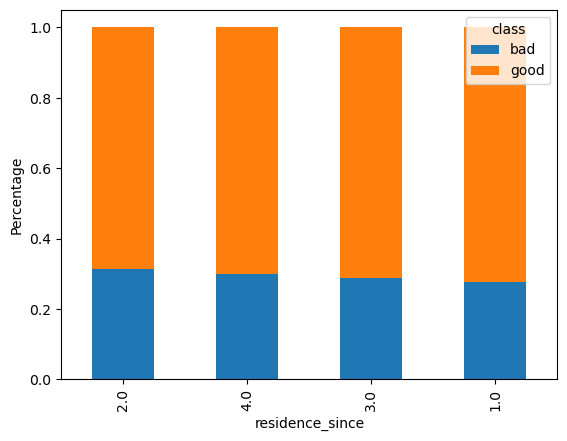

In [333]:
# For each category in the residence_since column, get the percentage of customers who are classed as good and bad then plot the results as a bar chart with two stacked bars for each category sorted by the percentage of bad customers
df.groupby('residence_since')['class'].value_counts(normalize=True).unstack().sort_values(by='bad', ascending=False).plot(kind='bar', stacked=True)

# Y axis label
plt.ylabel('Percentage')

Surprisingly, the length of time you have lived at your current residence does not seem to have a large impact on whether you are a good fit for credit.

### property_magnitude

In [334]:
# Get the unique values in the property_magnitude column
df['property_magnitude'].unique()

array(['real estate', 'life insurance', 'no known property', 'car'],
      dtype=object)

Property magnitude is a categorical variable that describes the customer's highest level of 'property' ownership. 

<!-- Table of categories -->
<table>
<thead>
  <tr>
    <th>Category</th>
    <th>Definition</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>real estate</td>
    <td>They own real estate</td>
  </tr>
  <tr>
    <td>building society savings agreement/life insurance</td>
    <td>They have a building society savings agreement or life insurance</td>
  </tr>
  <tr>
    <td>car or other</td>
    <td>They own a car or other</td>
  </tr>
  <tr>
    <td>unknown/no property</td>
    <td>They do not own a car or other</td>
  </tr>

<Axes: xlabel='property_magnitude', ylabel='count'>

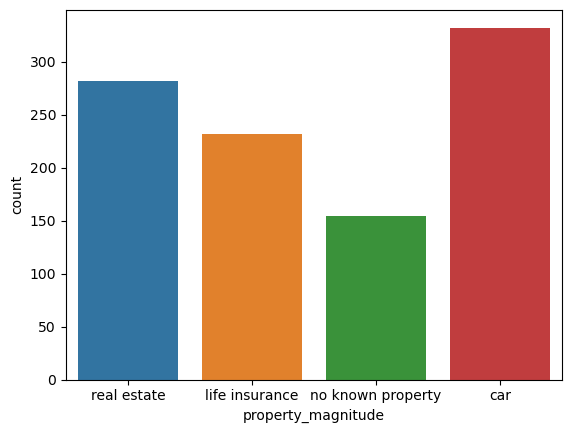

In [335]:
# Plotting a graph of the number of data point in each property_magnitude category
sns.countplot(x='property_magnitude', data=df)

There seems to be a fairly even spread of customers across the categories. This means that the model will be able to assess customers with all property magnitudes fairly well.

Text(0, 0.5, 'Percentage')

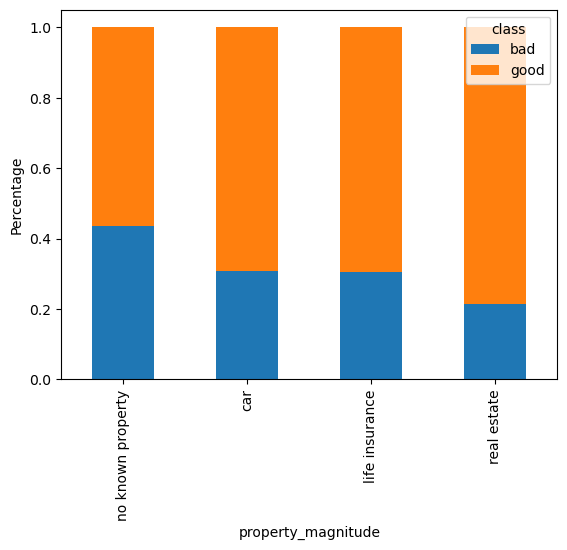

In [336]:
# For each category in the property_magnitude column, get the percentage of customers who are classed as good and bad then plot the results as a bar chart with two stacked bars for each category sorted by the percentage of bad customers
df.groupby('property_magnitude')['class'].value_counts(normalize=True).unstack().sort_values(by='bad', ascending=False).plot(kind='bar', stacked=True)

# Y axis label
plt.ylabel('Percentage')

As expected the higher the level of property ownership, the more likely you are to be a good fit for credit. This is because you are more likely to have a stable income and therefore be able to pay back the credit.

### Age

In [337]:
# Get the info values in the age
df['age'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64

<Axes: xlabel='age'>

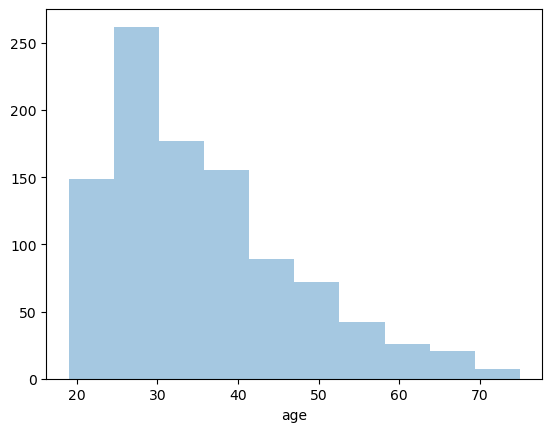

In [338]:
# Plotting a graph of the number of data point in each age category using a histogram
sns.distplot(df['age'], bins=10, kde=False)

Here we can see that the majority of customers are between 27 and 42 years old. This means that the model will be better at assessing customers who are between 27 and 42 years old and may not be as accurate for customers who are older or younger.

No-one was below 18 years old which is the legal age to apply for credit in Germany.

Text(0, 0.5, 'Percentage')

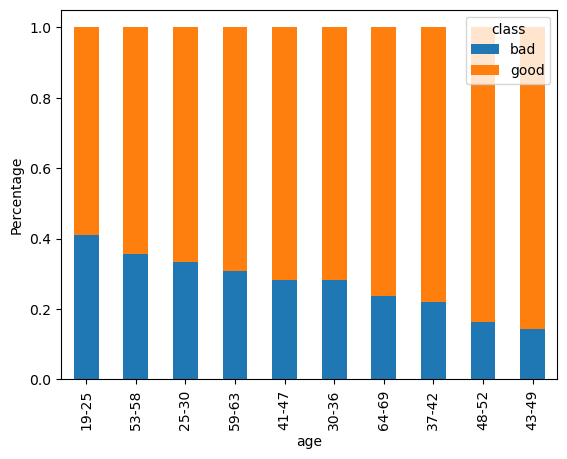

In [339]:
# Copy df to local variable
df2 = df.copy()

# Combine the age column into 10 bins 
df2['age'] = pd.cut(df2['age'], bins=10)

# For each category in the age column, get the percentage of customers who are classed as good and bad then plot the results as a bar chart with two stacked bars for each category
df2.groupby('age')['class'].value_counts(normalize=True).unstack().sort_values(by='bad', ascending=False).plot(kind='bar', stacked=True)

# change the x axis label to 19-25, 53-58, 25-30, 59-63, 41-47, 30-36, 64-69, 37-42, 48-52, 43-49
plt.xticks([0,1,2,3,4,5,6,7,8,9], ['19-25', '53-58', '25-30', '59-63', '41-47', '30-36', '64-69', '37-42', '48-52', '43-49'])

# y axis label
plt.ylabel('Percentage')

Here it can be seen that people who are middle aged are more likely to be a good fit for credit. This is because they are more likely to have a stable income and therefore be able to pay back the credit compared to younger people and they are less likely to have health problems compared to older people.

### other_payment_plans

In [340]:
# Get the unique values in the other_payment_plans column
df['other_payment_plans'].unique()

array(['none', 'bank', 'stores'], dtype=object)

Other payment plans is a categorical variable that describes whether the customer has any other payment plans or loans. The categories are as follows:

<!-- Table of categories -->
<table>
<thead>
  <tr>
    <th>Category</th>
    <th>Definition</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>bank</td>
    <td>They have a bank loan</td>
  </tr>
  <tr>
    <td>stores</td>
    <td>They have a loan from a store</td>
  </tr>
  <tr>
    <td>none</td>
    <td>They have no other payment plans or loans</td>
  </tr>

<Axes: xlabel='other_payment_plans', ylabel='count'>

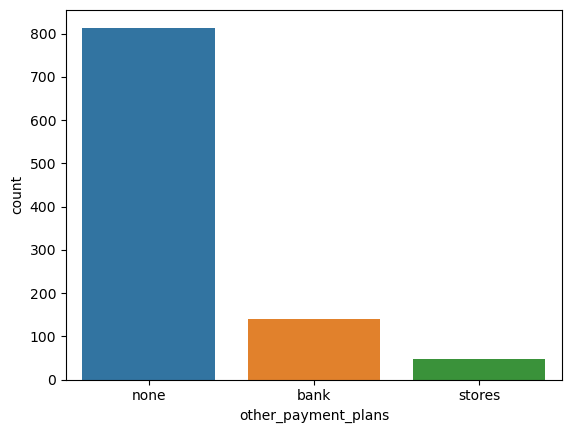

In [341]:
# Plotting a graph of the number of data point in each other_payment_plans category
sns.countplot(x='other_payment_plans', data=df)

As shown above, the majority of customers have no other payment plans or loans. This means that the model will be better at assessing customers with no other payment plans or loans and may not be as accurate for customers with other payment plans or loans.

Text(0, 0.5, 'Percentage')

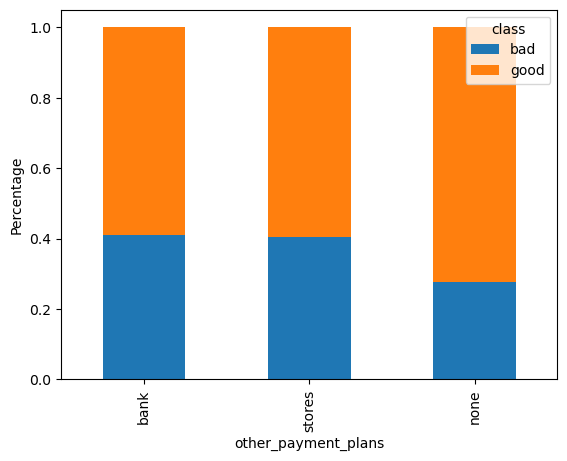

In [342]:
# For each category in the other_payment_plans column, get the percentage of customers who are classed as good and bad then plot the results as a bar chart with two stacked bars for each category
df.groupby('other_payment_plans')['class'].value_counts(normalize=True).unstack().sort_values(by='bad', ascending=False).plot(kind='bar', stacked=True)

# y axis label
plt.ylabel('Percentage')

As expected the more payment plans or loans you have, the more likely you are to be a bad fit for credit. This is because you are more likely to have a lower disposable income and therefore be less able to pay back the credit.

### housing

In [343]:
# Get the unique values in the housing column
df['housing'].unique()

array(['own', 'for free', 'rent'], dtype=object)

Housing describes the customer's housing situation. If they own their own house, rent or live for free.

<Axes: xlabel='housing', ylabel='count'>

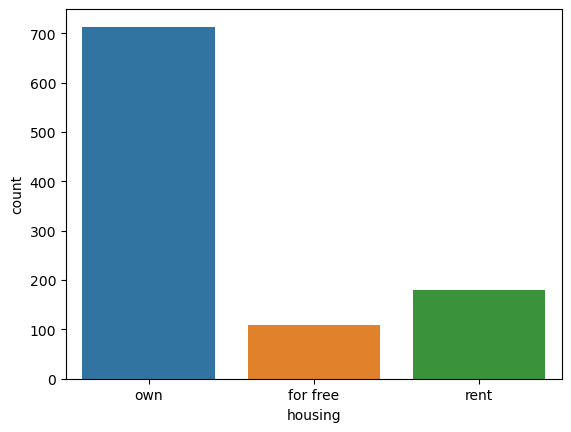

In [344]:
# Plotting a graph of the number of data point in each housing category
sns.countplot(x='housing', data=df)

The data seems to be biased to customers who iwn there own house. This means that the model will be better at assessing customers who own their own house and may not be as accurate for customers who rent or live for free.

Text(0, 0.5, 'Percentage')

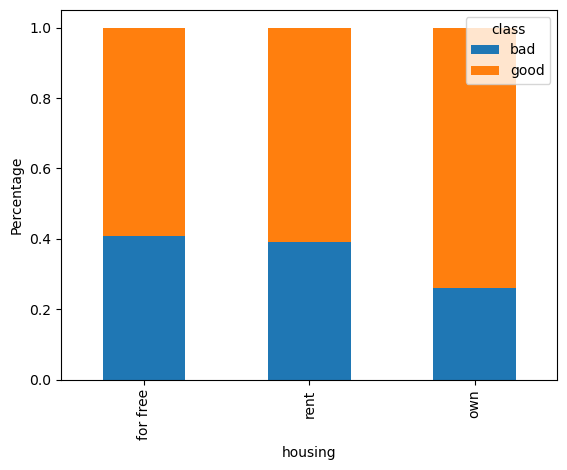

In [345]:
# For each category in the housing column, get the percentage of customers who are classed as good and bad then plot the results as a bar chart with two stacked bars for each category
df.groupby('housing')['class'].value_counts(normalize=True).unstack().sort_values(by='bad', ascending=False).plot(kind='bar', stacked=True)

# y axis label
plt.ylabel('Percentage')

As expected people who own their own house are more likely to be a good fit for credit. This is because they are more likely to have a stable income and therefore be able to pay back the credit.

### existing_credits

In [346]:
# Get the unique values in the existing_credits column
df['existing_credits'].unique()

array([2., 1., 3., 4.])

Existing credits is a numerical value that describes the number of existing lines of credits the customer has with the bank in question.

<Axes: xlabel='existing_credits', ylabel='count'>

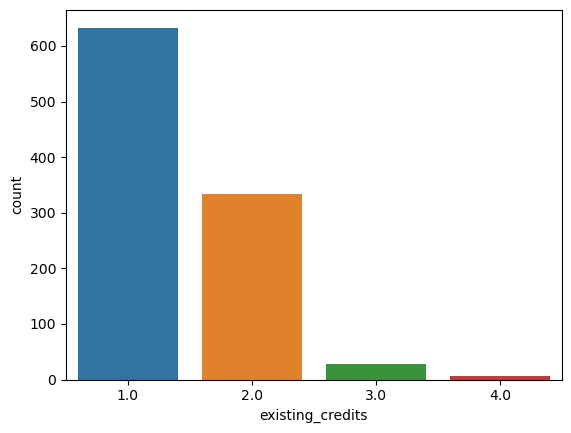

In [347]:
# Plotting a graph of the number of data point in each existing_credits category
sns.countplot(x='existing_credits', data=df)

Text(0, 0.5, 'Percentage')

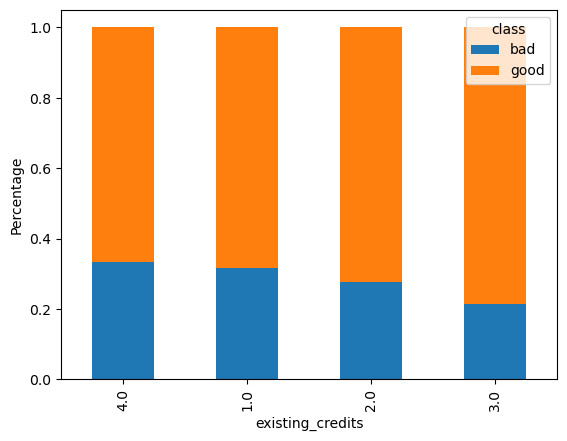

In [348]:
# For each category in the existing_credits column, get the percentage of customers who are classed as good and bad then plot the results as a bar chart with two stacked bars for each category
df.groupby('existing_credits')['class'].value_counts(normalize=True).unstack().sort_values(by='bad', ascending=False).plot(kind='bar', stacked=True)

# y axis label
plt.ylabel('Percentage')

Here the data shows that you are more likely to be a good fit for credit if you have 1 or more existing credit, however, if you have lots (4) then you are more likely to be a bad fit for credit as you may not be able to handle the extra credit.

### job

In [349]:
# Get the unique values in the job column
df['job'].unique()

array(['skilled', 'unskilled resident', 'high qualif/self emp/mgmt',
       'unemp/unskilled non res'], dtype=object)

Job is a categorical variable that describes the customer's job. The categories are as follows:

<!-- Table of categories -->
<table>
<thead>
  <tr>
    <th>Category</th>
    <th>Definition</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>unemp/unskilled non res</td>
    <td>They are unemployed or unskilled and do not live in the area</td>
  </tr>
  <tr>
    <td>unskilled - resident</td>
    <td>They are unskilled and live in the area</td>
  </tr>
  <tr>
    <td>skilled</td>
    <td>They are a skilled employee or official</td>
  </tr>
  <tr>
    <td>high qualif/self emp/mgmt</td>
    <td>They are a manager, self-employed or highly qualified employee or officer</td>
  </tr>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'skilled'),
  Text(1, 0, 'unskilled resident'),
  Text(2, 0, 'high qualif/self emp/mgmt'),
  Text(3, 0, 'unemp/unskilled non res')])

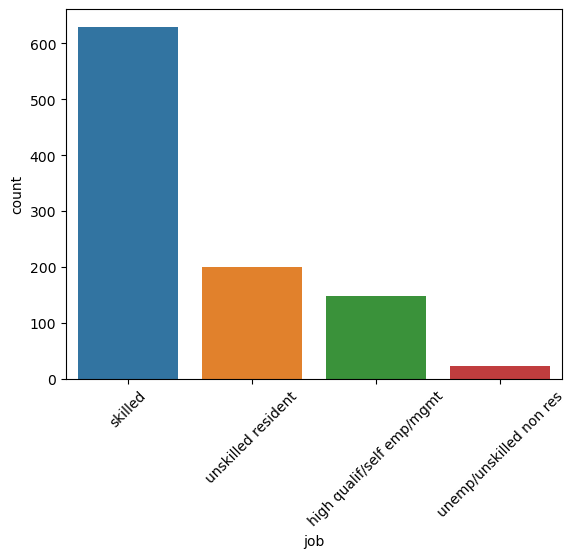

In [350]:
# Plotting a graph of the number of data point in each job category
sns.countplot(x='job', data=df)

# Angle the x axis labels
plt.xticks(rotation=45)

Here we seem to have a bias to customers who are skilled. This means that the model will be better at assessing customers who are skilled and may not be as accurate for customers who are unemployed or unskilled.

Text(0, 0.5, 'Percentage')

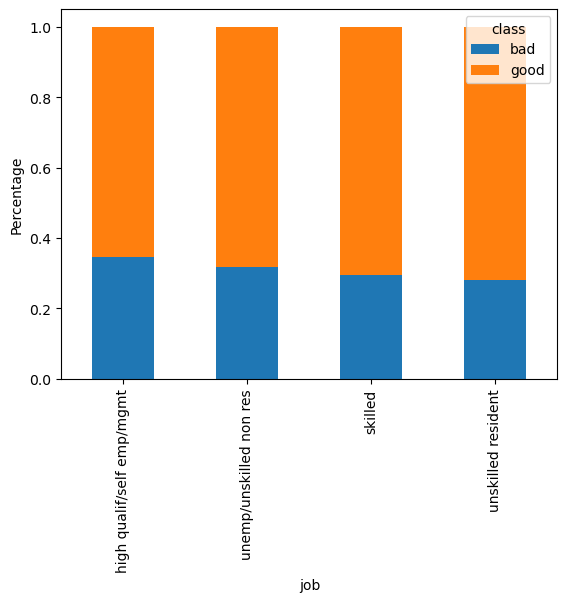

In [351]:
# For each category in the job column, get the percentage of customers who are classed as good and bad then plot the results as a bar chart with two stacked bars for each category
df.groupby('job')['class'].value_counts(normalize=True).unstack().sort_values(by='bad', ascending=False).plot(kind='bar', stacked=True)

# y axis label
plt.ylabel('Percentage')


However, despite the bias it seems that the type of job you have does not have a large impact on whether you are a good fit for credit.

### num_dependents

In [352]:
# Get the unique values in the num_dependents column
df['num_dependents'].unique()

array([1., 2.])

The number of dependents is a numerical value that describes the number of people the customer has to support. 

<Axes: xlabel='num_dependents', ylabel='count'>

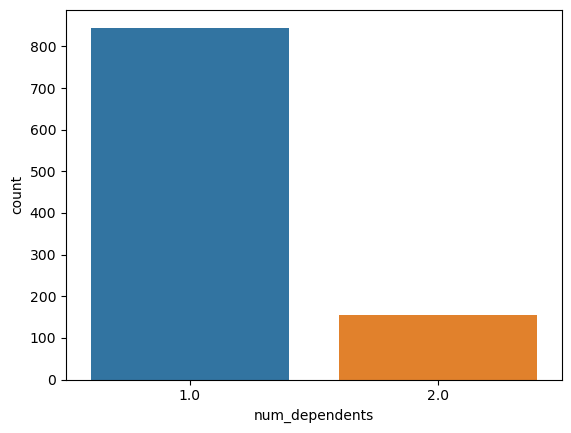

In [353]:
# Plotting a graph of the number of data point in each num_dependents category
sns.countplot(x='num_dependents', data=df)

It seems that the majority of customers have 1 dependent. This means that the model will be better at assessing customers with 1 dependent and may not be as accurate for customers with more than 1 dependent. There also doesn't seem to be any customers with 0 dependents which means that the model will not be able to assess customers with 0 dependents.

Text(0, 0.5, 'Percentage')

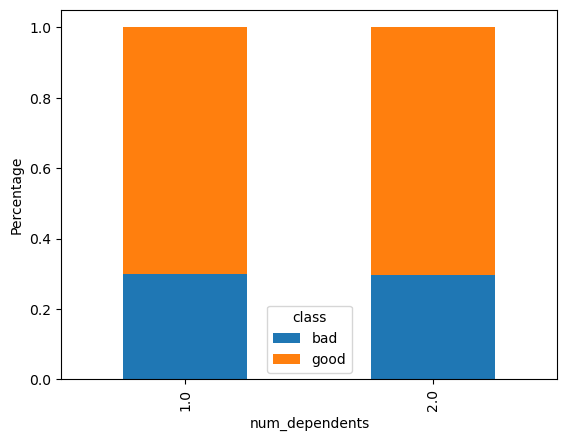

In [354]:
# For each category in the num_dependents column, get the percentage of customers who are classed as good and bad then plot the results as a bar chart with two stacked bars for each category
df.groupby('num_dependents')['class'].value_counts(normalize=True).unstack().sort_values(by='bad', ascending=False).plot(kind='bar', stacked=True)

# y axis label
plt.ylabel('Percentage')


However, regardless of the number of dependents you have, it seems there is no discernable impact on whether you are a good fit for credit.

### own_telephone

In [355]:
# Get the unique values in the own_telephone column
df['own_telephone'].unique()

array(['yes', 'none'], dtype=object)

This is a categorical variable that describes whether the customer has their own telephone. it is either yes or no.

<Axes: xlabel='own_telephone', ylabel='count'>

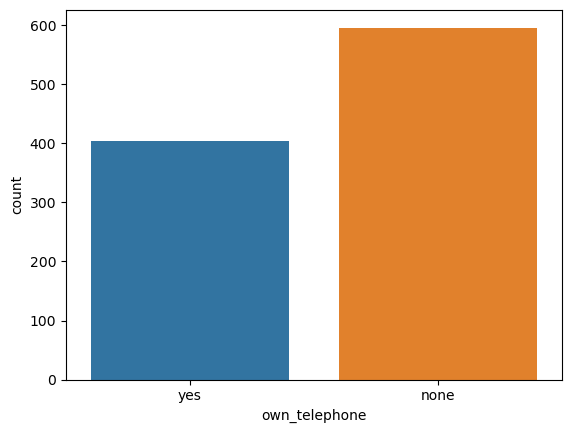

In [356]:
# Plotting a graph of the number of data point in each own_telephone category
sns.countplot(x='own_telephone', data=df)

There is a bias towards customers who do not own a telephone. This makes sense as the data is from 1994 and telephones were not as common as they are today. This means that the model will be better at assessing customers who do not own a telephone and may not be as accurate for customers who do own a telephone.

Text(0, 0.5, 'Percentage')

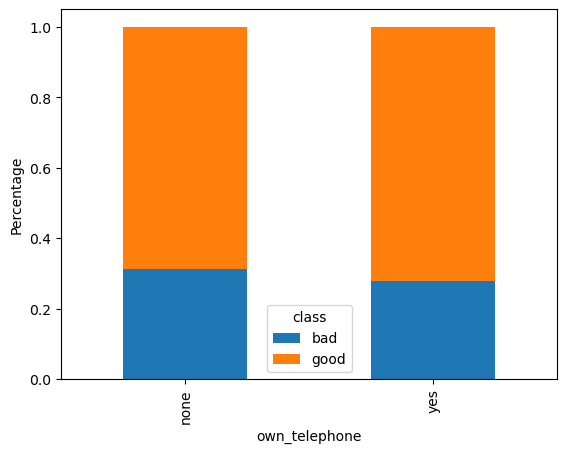

In [357]:
# For each category in the own_telephone column, get the percentage of customers who are classed as good and bad then plot the results as a bar chart with two stacked bars for each category
df.groupby('own_telephone')['class'].value_counts(normalize=True).unstack().sort_values(by='bad', ascending=False).plot(kind='bar', stacked=True)

# y axis label
plt.ylabel('Percentage')

However, despite the bias it seems that whether you own a telephone or not does not have a large impact on whether you are a good fit for credit.

### foreign_worker

In [358]:
# Get the unique values in the foreign_worker column
df['foreign_worker'].unique()

array(['yes', 'no'], dtype=object)

This is a categorical variable that describes whether the customer is a foreign worker. it is either yes or no.

<Axes: xlabel='foreign_worker', ylabel='count'>

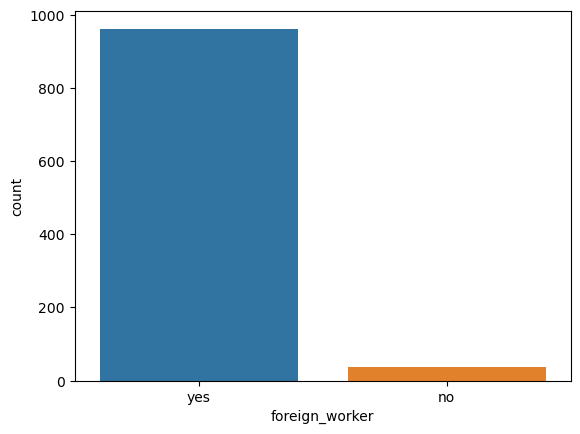

In [359]:
# Plotting a graph of the number of data point in each foreign_worker category
sns.countplot(x='foreign_worker', data=df)

There seems to a a very large bias towards customers who are foreign workers. This means that the model will be better at assessing customers who are foreign workers and may not be as accurate for customers who are not foreign workers.

Text(0, 0.5, 'Percentage')

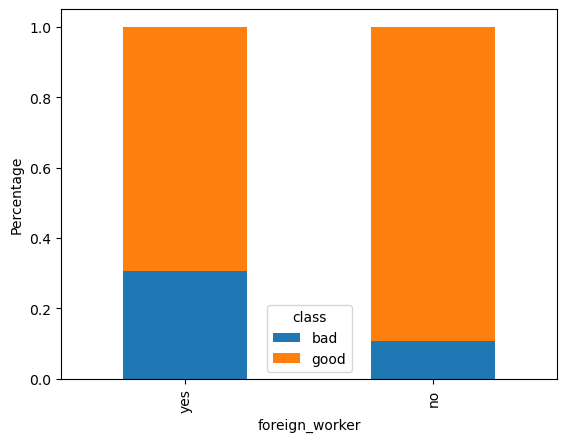

In [360]:
# For each category in the foreign_worker column, get the percentage of customers who are classed as good and bad then plot the results as a bar chart with two stacked bars for each category
df.groupby('foreign_worker')['class'].value_counts(normalize=True).unstack().sort_values(by='bad', ascending=False).plot(kind='bar', stacked=True)

# y axis label
plt.ylabel('Percentage')

However, it seems that domestic workers are more likely to be a good fit for credit. 

### Class

In [361]:
# Get the unique values in the class column
df['class'].unique()

array(['good', 'bad'], dtype=object)

Class is a categorical variable that describes whether the customer is a good or bad fit for credit.

<Axes: xlabel='class', ylabel='count'>

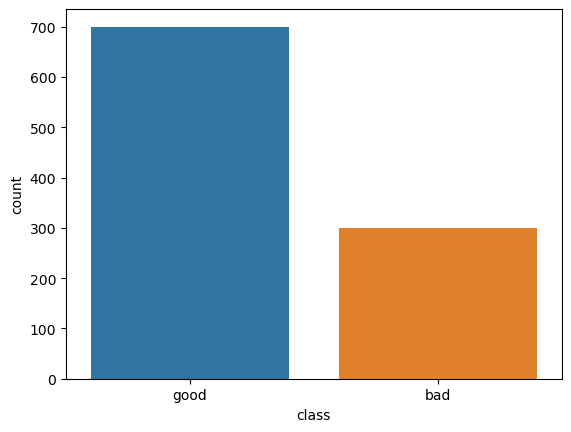

In [362]:
# Plotting a graph of the number of data point in each class category
sns.countplot(x='class', data=df)

The data seems to be biased towards customers who are a good fit for credit. This means that the model will be better at assessing customers who are a good fit for credit and may not be as accurate for customers who are a bad fit for credit.

## Initial Data Exploration Summary

This section has explored the dataset and identified that the data is not balanced. This means that the model will be better at processing certain types of customers and may not be as accurate for other types of customers. Ideally the data would be balanced so that the model can be trained on all types of customers across all categories, this could be achieved by collecting more data or by removing some of the data. Getting more data is not feasible and removing data is also not feasible as the data is already quite small and removing data would make it even smaller and not usable for the number of features we have.

The most important biases are as follows:

- The data is biased towards customers who are a good fit for credit. This means that the model will be better at assessing customers who are a good fit for credit and may not be as accurate for customers who are a bad fit for credit. This is critical as the model may miss-classify customers who are a bad fit for credit as a good fit for credit and therefore give them credit when they should not have it.
- The data is also biased towards customers who are skilled. This means that the model will be better at assessing customers who are skilled and may not be as accurate for customers who are unemployed or unskilled who are more likely to be a bad fit for credit.
- It is also weighted to customers who own their own house. This means that the model will be better at assessing customers who own their own house and may not be as accurate for customers who rent or live for free who are more likely to be a bad fit for credit.


Additionally the data was analysed to see if there are any initial correlations between features and the class. The following features seem to have a correlation with the class:

- Duration, the longer the duration the more likely you are to be a bad fit for credit.
- Credit amount, the larger the credit amount the more likely you are to be a bad fit for credit.
- Length of employment, the longer you have been employed the more likely you are to be a good fit for credit.
- checking_status, the more you have in your checking account the more likely you are to be a good fit for credit.

The following features seem to have little correlation with the class:
- Sex
- Purpose
- Type of job

These are just initial correlations and may not be accurate. Once the model has been trained we will be able to see which features are the most important.

## Machine Learning

### Data Preprocessing

As there are many categorical features in the dataset, these need to be converted to numerical values so that the model can process them. This is done using label encoding. This assigns a numerical value to each category in the feature. For example, if a feature has 3 categories, A, B and C, then A would be assigned 0, B would be assigned 1 and C would be assigned 2. This is done for all categorical features.

Additionally, the numerical features need to be scaled so that they are all on the same scale. This is done using standard scaling. This scales the data so that the mean is 0 and the standard deviation is 1. This is done for all numerical features.

In [363]:
# Create a labelencoder object
labelencoder = LabelEncoder()

# Scaler object
scaler = StandardScaler()

# checking_status
df['checking_status'] = labelencoder.fit_transform(df['checking_status'])

# duration
df['duration'] = scaler.fit_transform(df['duration'].values.reshape(-1, 1))

# credit_history
df['credit_history'] = labelencoder.fit_transform(df['credit_history'])

# purpose
df['purpose'] = labelencoder.fit_transform(df['purpose'])

# credit_amount
df['credit_amount'] = scaler.fit_transform(df['credit_amount'].values.reshape(-1, 1))

# savings_status
df['savings_status'] = labelencoder.fit_transform(df['savings_status'])

# employment
df['employment'] = labelencoder.fit_transform(df['employment'])

# installment_commitment
df['installment_commitment'] = scaler.fit_transform(df['installment_commitment'].values.reshape(-1, 1))

# sex
df['sex'] = labelencoder.fit_transform(df['sex'])

# marital_status
df['marital_status'] = labelencoder.fit_transform(df['marital_status'])

# other_parties
df['other_parties'] = labelencoder.fit_transform(df['other_parties'])

# residence_since
df['residence_since'] = scaler.fit_transform(df['residence_since'].values.reshape(-1, 1))

# property_magnitude
df['property_magnitude'] = labelencoder.fit_transform(df['property_magnitude'])

# age
df['age'] = scaler.fit_transform(df['age'].values.reshape(-1, 1))

# other_payment_plans
df['other_payment_plans'] = labelencoder.fit_transform(df['other_payment_plans'])

# housing
df['housing'] = labelencoder.fit_transform(df['housing'])

# existing_credits
df['existing_credits'] = scaler.fit_transform(df['existing_credits'].values.reshape(-1, 1))

# job
df['job'] = labelencoder.fit_transform(df['job'])

# num_dependents
df['num_dependents'] = scaler.fit_transform(df['num_dependents'].values.reshape(-1, 1))

# own_telephone
df['own_telephone'] = labelencoder.fit_transform(df['own_telephone'])

# foreign_worker
df['foreign_worker'] = labelencoder.fit_transform(df['foreign_worker'])

# class
df['class'] = labelencoder.fit_transform(df['class']) # 1 = Good, 0 = Bad


In [364]:
# Display the data that will be used for the prediction
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,residence_since,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,sex,marital_status
0,1,-1.236478,1,6,-0.745131,4,3,0.918477,2,1.046987,...,1,1,1.027079,1,-0.428290,1,1,1,1,3
1,0,2.248194,3,6,0.949817,2,0,-0.870183,2,-0.765977,...,1,1,-0.704926,1,-0.428290,0,1,0,0,0
2,3,-0.738668,1,2,-0.416562,2,1,-0.870183,2,0.140505,...,1,1,-0.704926,3,2.334869,0,1,1,1,3
3,1,1.750384,3,3,1.634247,2,1,-0.870183,1,1.046987,...,1,0,-0.704926,1,2.334869,0,1,1,1,3
4,1,0.256953,2,4,0.566664,2,0,0.024147,2,1.046987,...,1,0,1.027079,1,2.334869,0,1,0,1,3


### Model Selection

<!-- Imbed cheat sheet image -->
<img src="https://blogs.sas.com/content/subconsciousmusings/files/2017/04/machine-learning-cheet-sheet-2.png"  width="800">

As this is a classification problem, the model used will be a classification model additionally, as the model is not working in real time accuracy should be preferred over speed.

This means we can use any of the following models:
- Kernel SVM
- Random Forest
- Neural Network
- Gradient Boosting Tree

For this project Random Forest will be used as it is a good all round model that handles data with large dimensionality and imbalances well. Additionally, it is easy to interpret and can be used to identify the most important features.


### Training the Model

#### Using Default Parameters

In [366]:
# The model will be trained on 80% of the data and tested on 20% of the data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Get the accuracy of the model
accuracy_score(y_test, predictions)

0.79

Here we can see that using default hyperparameter an accuracy score of 79% is achieved. This is a good starting point but can be improved by fine tuning.

#### Using Grid Search

In [367]:
# Use GridSearchCV to find the best parameters for the model along with KFold cross validation to get a more accurate accuracy score

# Warning: This may take a while to run, depending on your computer. On a i7-8700k with 16GB of RAM, it took about 30 seconds to run.

# Define the model 
model = RandomForestClassifier(random_state=42)
Kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameters to be tested
n_estimators=np.array([10, 50, 100, 150, 200, 500])
min_samples_leaf=np.array([2, 5, 50, 75, 100, 150, 200])

# Create a dictionary of the parameters
param_grid = dict(n_estimators=n_estimators,min_samples_leaf=min_samples_leaf)

# Create the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=Kfold, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid
grid_result = grid.fit(df.drop('class', axis=1), df['class'])

# Summarize results
print("Best Perameters are %s" % grid_result.best_params_) # Spoiler alert: {'min_samples_leaf': 5, 'n_estimators': 150} are the best parameters


Fitting 5 folds for each of 42 candidates, totalling 210 fits


Best Perameters are {'min_samples_leaf': 5, 'n_estimators': 150}


## Results

In [368]:
# Get the best model
best_model = grid_result.best_estimator_

# Get the accuracy score of the best model
y_test = df['class']
x_test = df.drop('class', axis=1)
predictions = best_model.predict(x_test)

# Print accuracy score
print(accuracy_score(y_test, predictions))

0.894


As you can see by tuning the model we were able to increase the accuracy from 79% to 89.4%. This is a significant improvement and means that the model is now much more accurate.

In [369]:
# Print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.67      0.79       300
           1       0.88      0.99      0.93       700

    accuracy                           0.89      1000
   macro avg       0.92      0.83      0.86      1000
weighted avg       0.90      0.89      0.89      1000



[Text(0, 0.5, 'Bad'), Text(0, 1.5, 'Good')]

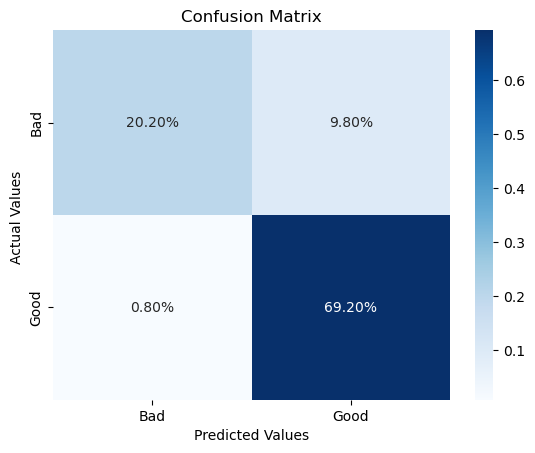

In [370]:
# Create a confusion matrix
confusionMatrix= confusion_matrix(y_test, predictions)

# Plot the confusion matrix
ax = sns.heatmap(confusionMatrix/np.sum(confusionMatrix), annot=True,  fmt='.2%', cmap='Blues')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.set_title('Confusion Matrix')

# Rename 0 and 1 to Bad and Good
ax.xaxis.set_ticklabels(['Bad', 'Good'])
ax.yaxis.set_ticklabels(['Bad', 'Good'])


From the confusion matrix we can see that the model rarely miss-classifies customers who are a good fit for credit as a bad fit for credit. This is good as it means that the model will almost always give credit to customers who are a good fit for credit. 

However, this model does miss-classify customers who are a bad fit for credit as a good fit for credit. This is not ideal as it means that the model will give credit to customers who are a bad fit for credit. This is a problem as it means that the bank will lose money as they will be giving credit to customers who are a bad fit for credit and will not be able to pay it back.

Hopefully this can be improved by fine tuning the model further, worst case scenario the model can be biased towards predicting people will be bad fit for credit to limit the risk banks may take.

### Feature Importance

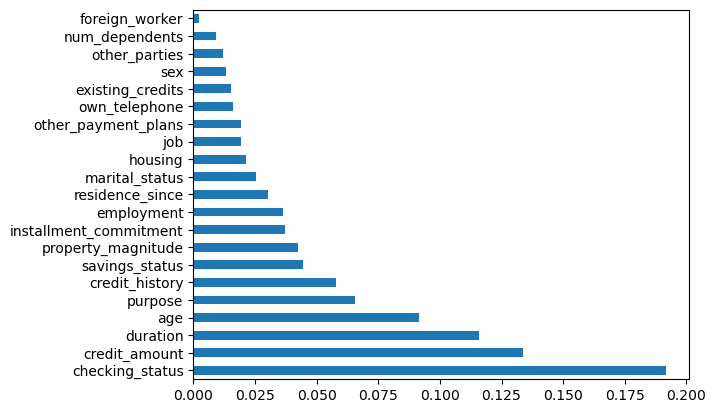

In [279]:
# Plot the feature importances of the best model in order of importance
feature_importances = pd.Series(best_model.feature_importances_, index=df.drop('class', axis=1).columns)
# Plot the feature importances in order of importance
feature_importances.nlargest(25).plot(kind='barh')
plt.show()

In [280]:
# Order the feature importances in order of importance
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)

checking_status           0.191605
credit_amount             0.133768
duration                  0.115895
age                       0.091463
purpose                   0.065454
credit_history            0.057764
savings_status            0.044655
property_magnitude        0.042259
installment_commitment    0.036997
employment                0.036489
residence_since           0.030289
marital_status            0.025421
housing                   0.021362
job                       0.019526
other_payment_plans       0.019213
own_telephone             0.016171
existing_credits          0.015261
sex                       0.013053
other_parties             0.012217
num_dependents            0.008993
foreign_worker            0.002145
dtype: float64


## Feature Optimisation
As all the features are not equally important, we can optimise the model by removing the least important features. This will reduce the dimensionality of the data and make the model more efficient, faster and potentially more accurate.

### Preprocessing

In [373]:
# Dropping the 6 least important features
optimised_df = df.copy()

# Drop the 6 least important features
optimised_df.drop(['foreign_worker', 'num_dependents', 'other_parties', 'sex', 'existing_credits', 'own_telephone'], axis=1, inplace=True)

# Head
optimised_df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,residence_since,property_magnitude,age,other_payment_plans,housing,job,class,marital_status
0,1,-1.236478,1,6,-0.745131,4,3,0.918477,1.046987,3,2.766456,1,1,1,1,3
1,0,2.248194,3,6,0.949817,2,0,-0.870183,-0.765977,3,-1.191404,1,1,1,0,0
2,3,-0.738668,1,2,-0.416562,2,1,-0.870183,0.140505,3,1.183312,1,1,3,1,3
3,1,1.750384,3,3,1.634247,2,1,-0.870183,1.046987,1,0.831502,1,0,1,1,3
4,1,0.256953,2,4,0.566664,2,0,0.024147,1.046987,2,1.535122,1,0,1,0,3


### Training

In [374]:
# Doing the same grid search as before, but with the optimised dataframe # Takes 30 seconds to run on a i7-8700k with 16GB of RAM

# Define the model
op_model = RandomForestClassifier(random_state=42)
op_kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameters to be tested
op_n_estimators=np.array([10, 50, 100, 150, 200, 500])
op_min_samples_leaf=np.array([2, 5, 50, 75, 100, 150, 200])

# Create a dictionary of the parameters
op_param_grid = dict(n_estimators=op_n_estimators,min_samples_leaf=op_min_samples_leaf)

# Create the grid
op_grid = GridSearchCV(estimator=op_model, param_grid=op_param_grid, cv=op_kfold, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid
op_grid_result = op_grid.fit(optimised_df.drop('class', axis=1), optimised_df['class'])

# Summarize results
print("Best Perameters are %s" % op_grid_result.best_params_) # Spoiler alert: {'min_samples_leaf': 2, 'n_estimators': 10} are the best parameters


Fitting 5 folds for each of 42 candidates, totalling 210 fits


Best Perameters are {'min_samples_leaf': 2, 'n_estimators': 10}


### New Results

In [375]:
# Get the best model
op_best_model = op_grid_result.best_estimator_

# Get the accuracy score of the best model
op_y_test = optimised_df['class']
op_x_test = optimised_df.drop('class', axis=1)
op_predictions = op_best_model.predict(op_x_test)

# Print accuracy score
print(accuracy_score(op_y_test, op_predictions))

0.949


Here we have managed to increase the accuracy of the model from 89.4% to 94.9%, this is a significant improvement and means that the model is now much more accurate. This was done by removing the least important features from the model. They may have been adding noise to the previous model and by removing them we have made the model more accurate.

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       300
           1       0.94      0.99      0.96       700

    accuracy                           0.95      1000
   macro avg       0.95      0.92      0.94      1000
weighted avg       0.95      0.95      0.95      1000



[Text(0, 0.5, 'Bad'), Text(0, 1.5, 'Good')]

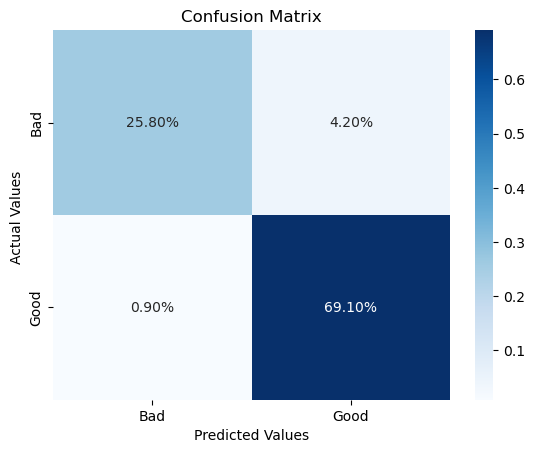

In [376]:
# Print classification report
print(classification_report(op_y_test, op_predictions))

# Create a confusion matrix
op_confusionMatrix= confusion_matrix(op_y_test, op_predictions)

# Plot the confusion matrix
ax = sns.heatmap(op_confusionMatrix/np.sum(op_confusionMatrix), annot=True,  fmt='.2%', cmap='Blues')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.set_title('Confusion Matrix')

# Rename 0 and 1 to Bad and Good
ax.xaxis.set_ticklabels(['Bad', 'Good'])
ax.yaxis.set_ticklabels(['Bad', 'Good'])

This new model is better than the previous, just like before it is still good at identifying people who are a good fit for credit. However, it is now much better at identifying people who are a bad fit for credit.

### Comparison to Original Model

[Text(0, 0.5, 'Bad'), Text(0, 1.5, 'Good')]

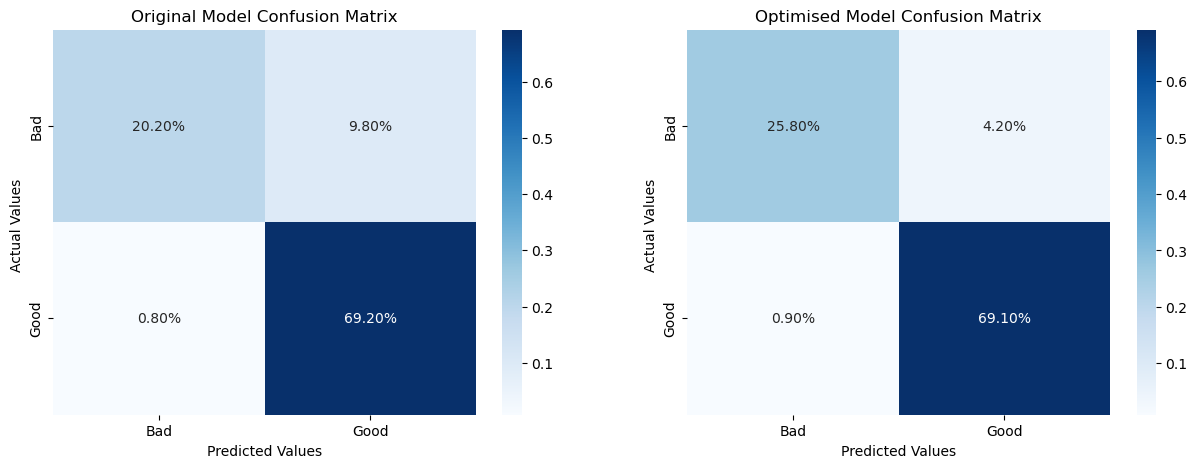

In [371]:
# Plot both confusion matrices side by side for comparison
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1 = sns.heatmap(confusionMatrix/np.sum(confusionMatrix), annot=True,  fmt='.2%', cmap='Blues', ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values ')
ax1.set_title('Original Model Confusion Matrix')

# Rename 0 and 1 to Bad and Good
ax1.xaxis.set_ticklabels(['Bad', 'Good'])
ax1.yaxis.set_ticklabels(['Bad', 'Good'])

ax2 = sns.heatmap(op_confusionMatrix/np.sum(op_confusionMatrix), annot=True,  fmt='.2%', cmap='Blues', ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values ')
ax2.set_title('Optimised Model Confusion Matrix')

# Rename 0 and 1 to Bad and Good
ax2.xaxis.set_ticklabels(['Bad', 'Good'])
ax2.yaxis.set_ticklabels(['Bad', 'Good'])



As shown by the comparison the additional accuracy of this improved model comes down from mainly better predictions about people with bad credit. This is good as it means that the model will be better at identifying people who are a bad fit for credit and will not give them credit.

<Axes: >

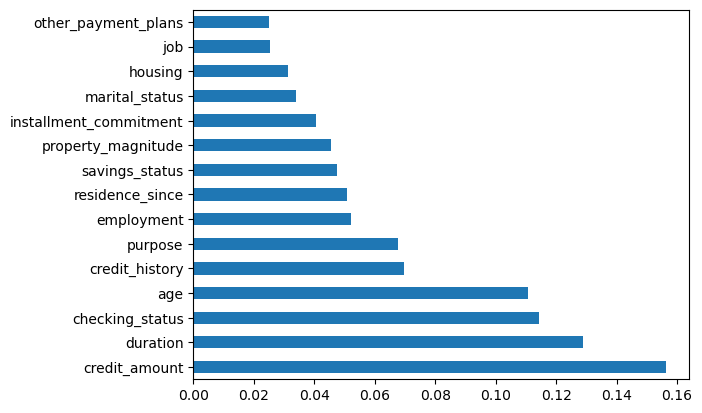

In [377]:
# Plot the feature importances of the best model in order of importance
op_feature_importances = pd.Series(op_best_model.feature_importances_, index=optimised_df.drop('class', axis=1).columns)
# Plot the feature importances in order of importance
op_feature_importances.nlargest(25).plot(kind='barh')

## Conclusion

In conclusion, we have managed to create a model that can predict whether a customer is a good or bad fit for credit with an accuracy of 94.9%. This is a significant improvement from the default model which had an accuracy of 79%. This was done by first using grid search to find the best hyperparameters for the model which resulted in an accuracy of 89%. Then using that model the most important features were identified and the model was retrained using only those features. This resulted in the final model which has an accuracy of 94.9%. Both objectives, to create a model that can determine whether a customer is a good or bad fit for credit and to identify the most important features, have been achieved. The most important features were found to be credit amount, duration, checking_status, age and credit_history.

As expected, the model does have some limitations. The model is better at predicting people who are a good fit for credit rather than people who are a bad fit for credit due to the initial imbalance of data. This would be bad for banks as the model could give credit to people who are a bad fit by accident causing the bank to lose money. However, this could be fixed by biasing the model towards predicting people are a bad fit for credit. The amount of bias would depend on how much risk the bank is willing to take as it would mean that the model would be less likely to give credit to people who are a good fit for credit which is trade off. This could be fixed in the future by collecting more data on people who are a bad fit for credit, or by over sampling the minority class or undersampling the majority class to balance the dataset.

Furthermore, although a machine learning model was created with the benefit of removing human bias from the decision making, it is important to consider that algorithmic biases still exist. For example one of the most important features was age which suggests that the algorithm will favour a certain age group. A lender generally can't deny a credit application or charge you higher interest rates or fees because of your age. However, using a machine learning model exists in a grey area as it may deny credit to people of a certain age group. As there is no laws and regulations around this it is important to consider this ethical challenge when using a machine learning model to make decisions to make sure everyone is treated fairly.

Ultimately, this model won't actually be useful as the data that it was trained on was from 1994 which is incredibly dated. This means that the model is not representative of the current population and therefore would not be accurate. However, this project was a good learning experience and the skills learnt can be applied to other projects. It also servers as proof that machine learning models can be used to predict whether a customer is a good or bad fit for credit.

Further improvements for this model can be made such as testing other models, using different hyperparameters and using different feature selections and comparing the accuracy to find out exactly what the best possible model it.